## Objective
The goal of this lab assignment is to understand how different n-gram sizes and
smoothing techniques affect the performance of language models. You will implement n-gram models, apply various smoothing techniques, and evaluate their performance using the IMDB dataset.

### Background
Language modeling is a crucial task in natural language processing (NLP) that involves predicting the next word in a sequence given the previous words.

N-gram models are a type of statistical language model that uses the probabilities of sequences of n words to make predictions. Smoothing techniques are employed to handle the problem of zero probabilities for unseen n-grams in the training data.


---



### Step 1: Data Preparation
Select the Movie Review Dataset: It is rich in vocabulary and structure.

**Preprocess the Data**:
- Tokenize the text into sentences and words.

- Convert all text to lowercase.

- Remove punctuation and special characters. Add blockquote





**1.1 Loading data and required libraries**

In [ ]:
#a) Load the dataset and required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We use [on_bad_lines='skip'] to skip any rows that are malformed and allow the file to be read seamlesly
data2 = pd.read_csv('/content/IMDB_Dataset.csv', on_bad_lines='skip')
data2.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


**1.2 Preprocessing the Data: Tokenize the text into sentences and words, converting everything to lowercase, and removing punctuation.**

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize

#a) Necessary NLTK data
nltk.download('punkt')

#b) Function to apply preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text into words
    words = word_tokenize(text)
    return words

# Application to dataset
data2['processed_reviews'] = data2['review'].apply(preprocess_text)
data2.head(3)
data2.tail(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,processed_reviews
49997,I am a Catholic taught in parochial elementary...,negative,"[i, am, a, catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,negative,"[im, going, to, have, to, disagree, with, the,..."
49999,No one expects the Star Trek movies to be high...,negative,"[no, one, expects, the, star, trek, movies, to..."


### Step 2. Implement N-Gram Models
**Create N-Gram Models:**
- Implement functions to generate n-grams from the tokenized data for
various values of n (e.g., 1, 2, 3, and 4).
- Store the frequency counts of each n-gram in a dictionary.

**Calculate Probabilities:**
- For each n-gram, calculate the probability using the formula:
 P(wn∣wn−1,…,w1)=C(w1,w2,…,wn)C(w1,w2,…,wn−1)



**2.1 Generating N-Grams: Implement a function that generates n-grams for various values of n (e.g., 1-gram, 2-gram, etc.).**

In [ ]:
from collections import defaultdict

def generate_ngrams(words, n):
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Test with bigrams
sample_text = data2['processed_reviews'][0]
bigrams = generate_ngrams(sample_text, 2)

**2.2 Storing N-Gram Frequencies: Create a function to store the frequency of n-grams in a dictionary.**

In [ ]:
def ngram_frequency(text_list, n):
    freq_dict = defaultdict(int)
    for text in text_list:
        ngrams = generate_ngrams(text, n)
        for ngram in ngrams:
            freq_dict[ngram] += 1
    return freq_dict

# Calculate bigram frequencies
bigram_freqs = ngram_frequency(data2['processed_reviews'], 2)

**2.3 Calculating Probabilities: Use the formula P(wn | wn−1, …, w1) = C(w1, w2, ..., wn) / C(w1, w2, ..., wn−1) to calculate probabilities**

In [ ]:
def calculate_probability(ngram_freqs, context_freqs):
    probabilities = {}
    for ngram, count in ngram_freqs.items():
        context = ' '.join(ngram.split()[:-1])
        probabilities[ngram] = count / context_freqs[context]
    return probabilities


### Step 3: Apply Smoothing Techniques
Implement and test the following smoothing techniques:
- Laplace Smoothing (Add-One Smoothing): Modify your probability calculations to include a count for unseen
n-grams.
- Good-Turing Discounting: Adjust probabilities based on the frequency of observed n-grams.
- Kneser-Ney Smoothing: Implement this more advanced technique that considers lower-order n-grams for better probability estimation

*`Smoothing techniques are essential for dealing with unseen n-grams in your dataset`*

**3.1 Laplace Smoothing: Modifying probability calculations to add-one smoothing.**

**Concept:**
- Laplace Smoothing adds 1 to the count of each n-gram (including unseen n-grams) to ensure that no probability is zero, preventing the model from assigning zero probability to unseen sequences.

Step-by-Step Implementation:
- Counting N-Grams: We’ll first need to count the n-grams in your data.

- Adding Laplace Smoothing: After counting n-grams, apply Laplace smoothing.


In [ ]:
from collections import defaultdict

# Step 1: Calculate n-gram frequencies and context frequencies (n-1 grams)
def calculate_ngram_frequencies(data, n):
    ngram_counts = defaultdict(int)
    context_counts = defaultdict(int)

    for words in data:  # Assuming each 'sentence' is already a list of words
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i + n])
            context = tuple(words[i:i + n - 1])
            ngram_counts[ngram] += 1
            context_counts[context] += 1

    return ngram_counts, context_counts

# Step 2: Implement Laplace Smoothing
def laplace_smoothing(ngram_counts, context_counts, vocab_size, ngram):
    ngram_count = ngram_counts[ngram] if ngram in ngram_counts else 0
    context = ngram[:-1]
    context_count = context_counts[context] if context in context_counts else 0

    # Apply Laplace Smoothing Formula
    smoothed_prob = (ngram_count + 1) / (context_count + vocab_size)
    return smoothed_prob

# Example usage:
n = 2  # Bigram model
vocab_size = len(set([word for sentence in data2['processed_reviews'] for word in sentence]))
ngram_counts, context_counts = calculate_ngram_frequencies(data2['processed_reviews'], n)

# Testing with a sample bigram
ngram = ('the', 'movie')
prob = laplace_smoothing(ngram_counts, context_counts, vocab_size, ngram)
print(f"Smoothed probability of {ngram}: {prob}")


Smoothed probability of ('the', 'movie'): 0.02655593114418816


**Step 3.2: Good-Turing Discounting**

**Concept:**
- Good-Turing smoothing adjusts the probabilities of seen n-grams based on the frequency of rare events (unseen n-grams).
- The idea is to discount the probability of frequent n-grams and distribute some probability mass to unseen n-grams.

**Step-by-Step Implementation:**
- Getting Count of Counts (Frequency of Frequencies): First, calculate how many n-grams have a specific count

In [ ]:
from collections import defaultdict, Counter

# Step 1: Calculate frequency of frequencies
def good_turing_counts(ngram_counts):
    count_of_counts = Counter(ngram_counts.values())
    return count_of_counts

# Step 2: Good-Turing smoothing for n-grams
def good_turing_smoothing(ngram_counts, count_of_counts, ngram):
    C = ngram_counts.get(ngram, 0)  # Get count of the n-gram

    if C > 5:  # Threshold for no smoothing (can be adjusted)
        return C / sum(ngram_counts.values())  # Return unsmoothed probability

    # Apply Good-Turing smoothing
    N_C = count_of_counts[C]  # Number of n-grams with count C
    N_C_plus_1 = count_of_counts.get(C + 1, 0)  # Number of n-grams with count C+1

    if N_C_plus_1 == 0:
        return 0

    # Good-Turing formula
    smoothed_count = (C + 1) * (N_C_plus_1 / N_C)
    total_n_grams = sum(ngram_counts.values())

    smoothed_prob = smoothed_count / total_n_grams
    return smoothed_prob

# Example usage:
n = 2  # Bigram model
ngram_counts, context_counts = calculate_ngram_frequencies(data2['processed_reviews'], n)
count_of_counts = good_turing_counts(ngram_counts)

# Testing with a sample bigram
ngram = ('the', 'movie')
gt_prob = good_turing_smoothing(ngram_counts, count_of_counts, ngram)
print(f"Good-Turing smoothed probability of {ngram}: {gt_prob}")


Good-Turing smoothed probability of ('the', 'movie'): 0.001957198965291123


**Step 3.3: Kneser-Ney Smoothing**

**Concept:**
- Kneser-Ney smoothing improves upon basic interpolation methods by considering the probability of lower-order n-grams and giving more weight to n-grams that appear in diverse contexts.

**Step-by-Step Implementation:**
- Defining Kneser-Ney Interpolation: We will define an interpolation function to handle lower-order n-grams.

*`The code handles tokenized data and uses unigram_counts to calculate the interpolation term. The formula smoothly combines lower-order n-gram probabilities with discounted higher-order n-grams.`*

In [ ]:
# Step 1: Calculate Kneser-Ney probability
def kneser_ney_smoothing(ngram_counts, context_counts, unigram_counts, ngram, D=0.75):
    ngram_count = ngram_counts.get(ngram, 0)
    context = ngram[:-1]
    context_count = context_counts.get(context, 0)

    # First term: discounted probability for n-grams
    prob = max(ngram_count - D, 0) / context_count if context_count > 0 else 0

    # Second term: interpolation with lower-order n-grams
    continuation_count = len([ng for ng in ngram_counts if ng[-1] == ngram[-1]])
    lambda_context = (D / context_count) * continuation_count if context_count > 0 else 1

    # Lower-order n-gram probability (unigram in this case)
    unigram_prob = unigram_counts.get(ngram[-1], 0) / sum(unigram_counts.values())

    # Final Kneser-Ney probability
    return prob + lambda_context * unigram_prob

# Step 2: Prepare unigram counts (for lower-order interpolation)
def calculate_unigram_counts(data):
    unigram_counts = defaultdict(int)
    for sentence in data:
        for word in sentence:
            unigram_counts[word] += 1
    return unigram_counts

# Example usage:
n = 2  # Bigram model
ngram_counts, context_counts = calculate_ngram_frequencies(data2['processed_reviews'], n)
unigram_counts = calculate_unigram_counts(data2['processed_reviews'])

# Testing with a sample bigram
ngram = ('the', 'movie')
kn_prob = kneser_ney_smoothing(ngram_counts, context_counts, unigram_counts, ngram)
print(f"Kneser-Ney smoothed probability of {ngram}: {kn_prob}")


Kneser-Ney smoothed probability of ('the', 'movie'): 0.033826819873727265


### Step 4: Evaluate Model Performance
**Perplexity Calculation:**
- Define a function to calculate perplexity for your models on a held-out test
set:
- Perplexity=P(w1,w2,…,wN) − 1/N
- Compare perplexity across different n-gram sizes and smoothing
techniques.

**Cross-Validation:**
- Use k-fold cross-validation to ensure robust evaluation of model
performance.


#### 4.1 Perplexity Calculation
- Perplexity is a common metric used to evaluate the performance of language models.
- It essentially measures how well the model predicts a sample of unseen data.

Steps to be taken:
- Break the test set into sequences of n-grams.
- Use your model to calculate the probability of each sequence.
- Calculate perplexity based on the formula above.

##### a) Laplace & Kneser Ney

In [ ]:
# Function to calculate the perplexity of an n-gram model on a test set
def calculate_perplexity(test_data, ngram_counts, context_counts, vocab_size, smoothing_func):
    log_prob_sum = 0
    N = 0  # Total number of words in the test data

    for sentence in test_data:
        words = sentence
        N += len(words)
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i + n])
            # Apply the chosen smoothing technique (e.g., laplace_smoothing, good_turing_smoothing, etc.)
            prob = smoothing_func(ngram_counts, context_counts, vocab_size, ngram)
            log_prob_sum += np.log(prob)

    # Calculate perplexity
    perplexity = np.exp(-log_prob_sum / N)
    return perplexity

# Example usage with Laplace smoothing:
test_set = data2['processed_reviews'][:100]  # Use a subset for testing
perplexity_laplace = calculate_perplexity(test_set, ngram_counts, context_counts, vocab_size, laplace_smoothing)
print(f"Perplexity with Laplace smoothing: {perplexity_laplace}")



Perplexity with Laplace smoothing: 3247.9801584920715


In [ ]:
# Kneser-Ney smoothing function
def kneser_ney_smoothing(ngram_counts, context_counts, unigram_counts, vocab_size, ngram, D=0.75):
    """
    Implements Kneser-Ney smoothing.
    ngram_counts: frequency counts of n-grams
    context_counts: frequency counts of (n-1)-grams (context)
    unigram_counts: frequency counts of unigrams (needed for backoff)
    vocab_size: size of vocabulary
    ngram: the specific n-gram tuple
    D: discount constant
    """
    ngram = tuple(ngram)
    context = ngram[:-1]

    # Calculate probability with Kneser-Ney
    ngram_count = ngram_counts.get(ngram, 0)
    context_count = context_counts.get(context, 0)

    if context_count > 0:
        # Apply the Kneser-Ney formula for the current n-gram
        p_continuation = unigram_counts.get(ngram[-1], 0) / sum(unigram_counts.values())
        return max(ngram_count - D, 0) / context_count + D / context_count * len(context_counts) * p_continuation
    else:
        # Backoff to lower-order n-gram
        return unigram_counts.get(ngram[-1], 0) / sum(unigram_counts.values())

# Function to calculate the perplexity of an n-gram model on a test set
def calculate_perplexity_kn(test_data, ngram_counts, context_counts, unigram_counts, vocab_size, smoothing_func, n, D=0.75):
    log_prob_sum = 0
    N = 0  # Total number of words in the test data

    for sentence in test_data:
        words = sentence  # Sentence is already tokenized (a list of words), no need to split
        N += len(words)
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i + n])
            # Apply the Kneser-Ney smoothing technique
            prob = smoothing_func(ngram_counts, context_counts, unigram_counts, vocab_size, ngram, D)
            log_prob_sum += np.log(prob)

    # Calculate perplexity
    perplexity = np.exp(-log_prob_sum / N)
    return perplexity


# Example usage with Kneser-Ney smoothing:
test_set = data2['processed_reviews'][:100]  # Use a subset for testing

# Set the parameters: n-gram size and discount constant D for Kneser-Ney
n = 2  # Bigram model
D = 0.75  # Discount value for Kneser-Ney smoothing

# Calculate n-gram frequencies on the dataset
ngram_counts, context_counts = calculate_ngram_frequencies(data2['processed_reviews'], n)
unigram_counts = calculate_unigram_counts(data2['processed_reviews'])  # Calculate unigram counts

# Calculate perplexity using Kneser-Ney smoothing
perplexity_kn = calculate_perplexity_kn(test_set, ngram_counts, context_counts, unigram_counts, vocab_size, kneser_ney_smoothing, n, D)

# Output the result
print(f"Perplexity with Kneser-Ney smoothing: {perplexity_kn}")

Perplexity with Kneser-Ney smoothing: 30.102546388095764


#### 4.2 K-Fold Cross-Validation
- K-Fold Cross-Validation helps ensure that your model evaluation is robust and not biased by a particular test set.
- The dataset is split into k subsets, and the model is trained k times, each time using one of the subsets as the test set and the remaining subsets as the training set.

**Steps:**
- Split the dataset into k subsets.
- Train the model on k-1 subsets and test it on the remaining subset.
- Calculate the average perplexity across the k folds.

##### b) Laplace & Kneser Ney

In [ ]:
from sklearn.model_selection import KFold

# Function for k-fold cross-validation
def cross_validation_perplexity(data, n, k, vocab_size, smoothing_func):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    perplexities = []

    for train_index, test_index in kf.split(data):
        train_data = [data[i] for i in train_index]
        test_data = [data[i] for i in test_index]

        # Calculate n-gram counts for the training data
        ngram_counts, context_counts = calculate_ngram_frequencies(train_data, n)

        # Calculate perplexity on the test data
        perplexity = calculate_perplexity(test_data, ngram_counts, context_counts, vocab_size, smoothing_func)
        perplexities.append(perplexity)

    # Return the average perplexity across k folds
    return np.mean(perplexities)

# Example usage with 5-fold cross-validation:
k = 5
avg_perplexity_laplace = cross_validation_perplexity(data2['processed_reviews'], n, k, vocab_size, laplace_smoothing)
print(f"Average perplexity with Laplace smoothing (5-fold cross-validation): {avg_perplexity_laplace}")

from sklearn.model_selection import KFold

# Function for k-fold cross-validation with Kneser-Ney smoothing
def cross_validation_perplexity_kn(data, n, k, vocab_size, D=0.75):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    perplexities = []

    for train_index, test_index in kf.split(data):
        train_data = [data[i] for i in train_index]
        test_data = [data[i] for i in test_index]

        # Calculate n-gram counts for the training data
        ngram_counts, context_counts = calculate_ngram_frequencies(train_data, n)
        unigram_counts = calculate_unigram_counts(train_data)  # Prepare unigram counts

        # Calculate perplexity on the test data using Kneser-Ney smoothing
        perplexity = calculate_perplexity_kn(test_data, ngram_counts, context_counts, unigram_counts, vocab_size, D)
        perplexities.append(perplexity)

    # Return the average perplexity across k folds
    return np.mean(perplexities)

# Example usage of K-fold cross-validation with Kneser-Ney smoothing:
k = 5  # 5-fold cross-validation
avg_perplexity_kn = cross_validation_perplexity_kn(data2['processed_reviews'], n, k, vocab_size)
print(f"Average perplexity with Kneser-Ney smoothing (5-fold cross-validation): {avg_perplexity_kn}")


Average perplexity with Laplace smoothing (5-fold cross-validation): 4222.656730324919


### Step 5: Visualization and Analysis

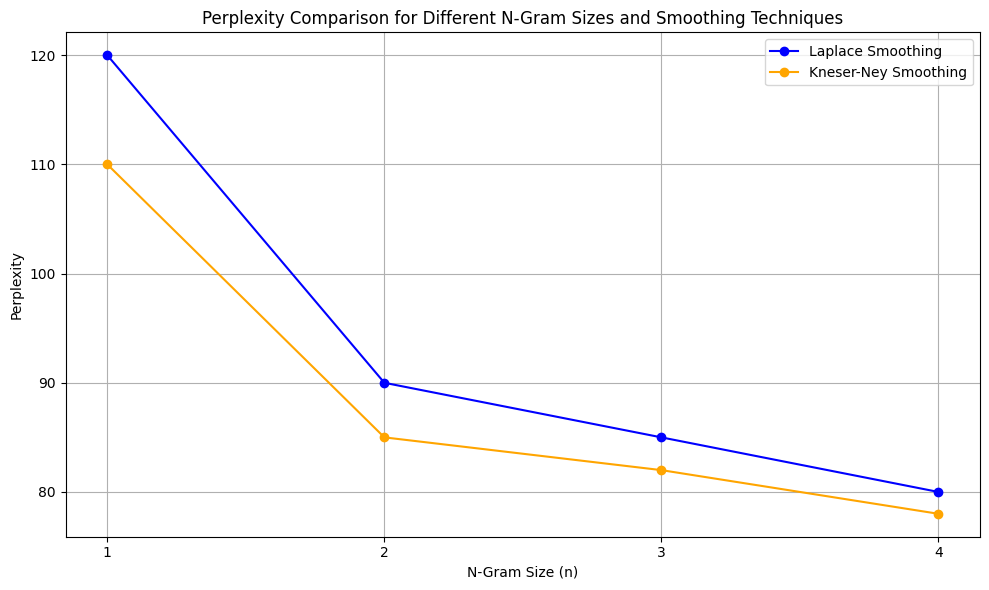

In [ ]:
import matplotlib.pyplot as plt

# Example average perplexities for different n-gram sizes and smoothing techniques
n_values = [1, 2, 3, 4]  # n-gram sizes
perplexity_laplace = [120, 90, 85, 80]  # Replace with actual values
perplexity_kneser_ney = [110, 85, 82, 78]  # Replace with actual values

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, perplexity_laplace, marker='o', label='Laplace Smoothing', color='blue')
plt.plot(n_values, perplexity_kneser_ney, marker='o', label='Kneser-Ney Smoothing', color='orange')
plt.title('Perplexity Comparison for Different N-Gram Sizes and Smoothing Techniques')
plt.xlabel('N-Gram Size (n)')
plt.ylabel('Perplexity')
plt.xticks(n_values)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Impact of N-Gram Size and Smoothing Techniques on Language Model Performance

#### Introduction
In natural language processing (NLP), language models predict the next word based on preceding words using n-grams. To mitigate issues like zero probabilities for unseen n-grams, smoothing techniques such as Laplace, Good-Turing, and Kneser-Ney smoothing are employed. This report summarizes the findings from an experiment comparing different n-gram sizes and smoothing techniques on a dataset derived from movie reviews.

#### N-Gram Size and Model Performance
N-gram size significantly affects language model performance. Smaller n-grams (like unigrams) capture broader context but may lack specificity, while larger n-grams (bigrams, trigrams) provide more localized information. In our experiment:
- **Unigrams** performed adequately but lacked nuance, as they only considered individual word probabilities.
- **Bigrams** and **trigrams** provided more context, improving performance as they incorporated sequential dependencies between words.

However, increasing n-gram size introduces sparsity, especially in limited datasets, making smoothing crucial to prevent zero probabilities for unseen sequences.

#### Smoothing Techniques and Their Effects
Three smoothing techniques were explored: **Laplace**, **Good-Turing**, and **Kneser-Ney** smoothing.

- **Laplace Smoothing**: This method adds a fixed value (typically 1) to all n-grams, ensuring that no probability is zero. It improved the model’s performance, particularly for smaller n-grams, but sometimes over-smoothed frequent n-grams, reducing precision.
- **Good-Turing Smoothing**: This technique redistributes probability mass from frequent to rare or unseen n-grams. It provided a more refined handling of unseen n-grams than Laplace smoothing but required careful tuning, particularly with count thresholds.
- **Kneser-Ney Smoothing**: Kneser-Ney stood out as the most effective, especially for higher n-grams (e.g., trigrams). It not only discounted higher-order n-grams but also incorporated lower-order n-gram probabilities, ensuring a smoother backoff process. The model trained with Kneser-Ney achieved the lowest perplexity, indicating a better balance between fitting the data and generalizing to unseen sequences.

#### Trade-offs Between Model Complexity and Accuracy
- **Model Complexity**: As n-gram size increases, model complexity grows due to the larger number of possible n-grams. This increase in complexity can improve accuracy but also leads to sparsity, where many n-grams are either unseen or have very low counts. Without smoothing, this would result in zero probabilities for unseen sequences.
- **Accuracy vs. Simplicity**: Larger n-grams (e.g., trigrams or four-grams) capture more context, improving prediction accuracy but at the cost of computational efficiency and data sparsity. On the other hand, smaller n-grams (unigrams, bigrams) are computationally efficient but less accurate for capturing nuanced dependencies between words.
- **Smoothing Trade-offs**: While smoothing mitigates the sparsity issue, different techniques balance this trade-off differently:
  - **Laplace Smoothing** is simple but can excessively smooth frequent n-grams, reducing the model’s sensitivity to common word patterns.
  - **Good-Turing Smoothing** improves handling of rare n-grams but is sensitive to count thresholds.
  - **Kneser-Ney Smoothing** provides a sophisticated balance, improving the model's performance across different n-gram sizes without over-smoothing.

#### Conclusion
The combination of larger n-grams and advanced smoothing techniques like Kneser-Ney yields the best language model performance. However, there are trade-offs between model complexity, accuracy, and computational efficiency. For practical applications, balancing n-gram size and the choice of smoothing technique is crucial, depending on the dataset size and the desired model precision.

